# Danish weather

Import some plotting libraries and set some defaults:

In [6]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

import random
random_seed = 5

sys.path.append('..')
from global_params import load_params

> **Tip:**  
> Producing figures in svg format (scalable vector graphics) makes for sharp plots on webpages. However, if you make plots with thousands of observations you should set this to `'png'` instead:

In [7]:
%config InlineBackend.figure_formats = ['svg'] 

> **Tip:**  
> Some values apply globally to your analysis. E.g., sample sizes, cutoffs, names, rates, etc. Keeping those in a a yml file like `weather_params.yml` and loading them in each notebook avoids the risk of manually adding/updating them in each notebook where they are used. You can use the `load_globals` function imported above from `global_params.py` to produce an object holding all the global values:

In [9]:
params = load_params('../weather_params.yml')
params

{'nr_project_days': 150}

In [11]:
params.nr_project_days

150

Here is some computation:

In [2]:
nr_project_days = 150
df = pd.DataFrame({'day': list(range(nr_project_days)), 
              'wind': [random.random()+1 for i in range(nr_project_days)], 
              'precipitation': [random.random()+1 for i in range(nr_project_days)]})
df

,day,wind,precipitation
0,0,1.013950,1.900108
1,1,1.433512,1.612078
2,2,1.465184,1.844704
3,3,1.438446,1.120334
4,4,1.052238,1.491236
...,...,...,...
145,145,1.071599,1.038249
146,146,1.884493,1.853783
147,147,1.743312,1.075927
148,148,1.794445,1.605397


## Weather data

In [3]:
#| echo: false
#| label: doc-weather-data

Markdown(f"""
         
Weather data was collected... blah, blah,  blah, blah,  blah, blah,  blah, blah,
blah, blah,  blah, blah,  blah, blah,  blah, blah,  blah, blah

""")


         
Weather data was collected... blah, blah,  blah, blah,  blah, blah,  blah, blah,
blah, blah,  blah, blah,  blah, blah,  blah, blah,  blah, blah



In [4]:
long_format = df.melt(id_vars=['day'], value_vars=['wind', 'precipitation'], var_name='weather', value_name='value')
long_format

,day,weather,value
0,0,wind,1.013950
1,1,wind,1.433512
2,2,wind,1.465184
3,3,wind,1.438446
4,4,wind,1.052238
...,...,...,...
295,145,precipitation,1.038249
296,146,precipitation,1.853783
297,147,precipitation,1.075927
298,148,precipitation,1.605397


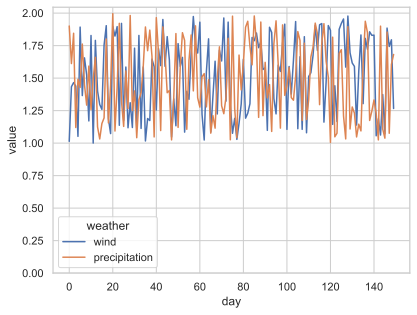

In [5]:
#| label: fig-danish-weather
#| fig-cap: "Danish weather: This is the weather forcast for your project"

sns.lineplot(data=long_format, x='day', y='value', hue='weather')
plt.ylim(bottom=0) ;

From this plot, it seems Danish weather is quite unpredictable.